# Creating profiles of the ditricts

In [1]:
import numpy as np
import pandas as pd
import os
 
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.mixture import GaussianMixture 

import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir(os.getcwd())

## I. Data preprocessing

### 1. Load data

In [2]:
# Import basic dataset
data = pd.read_excel('District demographics 2014.xls', sheetname = 'List_1')

# Extended dataset with 8 job types
# data = pd.read_excel('New Data Sets\District Demographics 2014.xls', sheetname = 'List_2')

# Extended dataset with 21 job types
# data = pd.read_excel('New Data Sets\District Demographics 2014.xls', sheetname = 'List_3')

In [3]:
# Create a dataframe
df = pd.DataFrame(data = data)

# Filling NaNs with zeors
df = df.fillna(0)

# Creating a column with total number of jobs per district
# s = df.ix[:, 'persons employed in agriculture, forestry and fisheries':]
# df['Total number of jobs'] = s.sum(axis = 1).values
district_names = df.index

### 2. Standatrization

In [4]:
# Standardizing population data
delimiter = df['Number of residents']
for i in range(1, 24):
    df[df.columns[i]] = df[df.columns[i]] / delimiter

# Standardizing household data
delimiter = df['Number of households']
for i in range(25, 32):
    df[df.columns[i]] = df[df.columns[i]] / delimiter
    
# Standardizing jobs data
# delimiter = df.iloc[:,-1]
# for i in range(33,51):
#     df[df.columns[i]] = df[df.columns[i]] / delimiter

In [5]:
# Dropping out irrelevant columns
df = df.drop(['Number of residents', 'Number of households'], axis = 1)
df = df.drop(['01 Oostduinen'], axis = 0)
# df = df.replace([np.inf, -np.inf], np.nan)
# df = df.fillna(0)
# df = df.drop(['Total number of jobs'], axis = 1)

# Obtaining names for further plotting
feature_names = df.index
factor_names =  df.columns

### 3. Rescale data

In [6]:
# Probably, we can consider only results obtained by using MinMaxScaler and MaxAbsScaler
# in theses cases reults makes sense

# Scale values from 0 to 1
# Scaling happens by column wise
scaler = MinMaxScaler(feature_range = (0, 1))
df = scaler.fit_transform(df)

# Scale each feature by its maximum absolute value.
# scaler = MaxAbsScaler()
# df = scaler().fit_transform(df)

# Robust scaler
# scaler = RobustScaler()
# df = scaler.fit_transform(df)

# Normalizer
# Normalization happens by row 
# scaler = Normalizer()
# df = scaler.fit_transform(df)

### 4. Exploring data with PCA

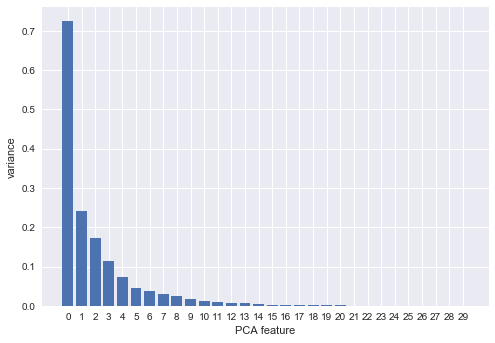

In [7]:
# 
pca = PCA()

# Fit the data to the model
pca.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### 5. Apply NMF

In [8]:
n_components = 7
model = NMF(n_components = n_components)
model.fit(df)
nmf_features = model.transform(df)
components = model.components_

W = nmf_features
H = components

W_df = pd.DataFrame(index = feature_names, columns = list(range(0, n_components)))
H_df = pd.DataFrame(index = list(range(0, n_components)) , columns = factor_names)

W_df.loc[:,:] = W
H_df.loc[:,:] = H

### 6. Plot clustermaps

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


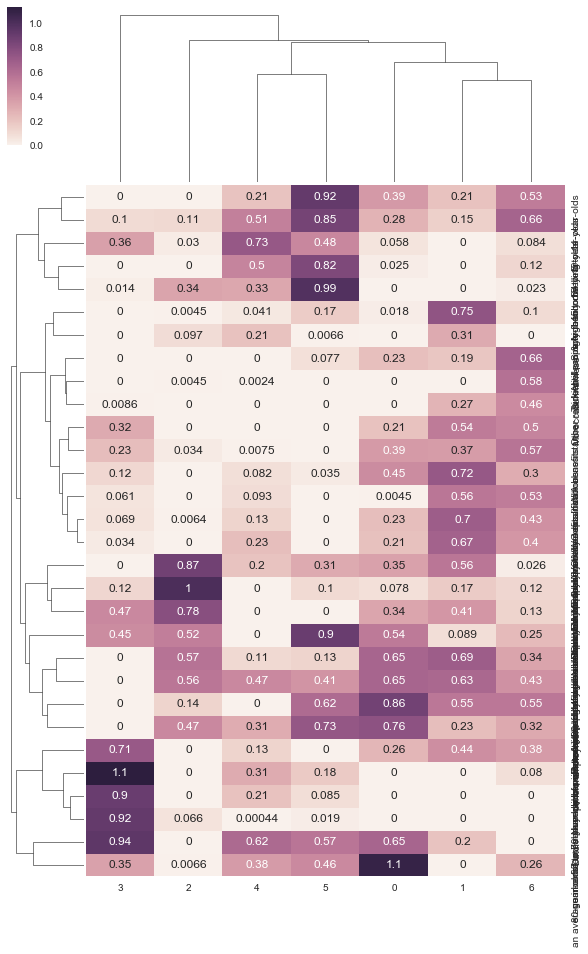

In [9]:
# Components - properties
sns.clustermap(H_df.T, figsize = [10,16], annot = True)
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


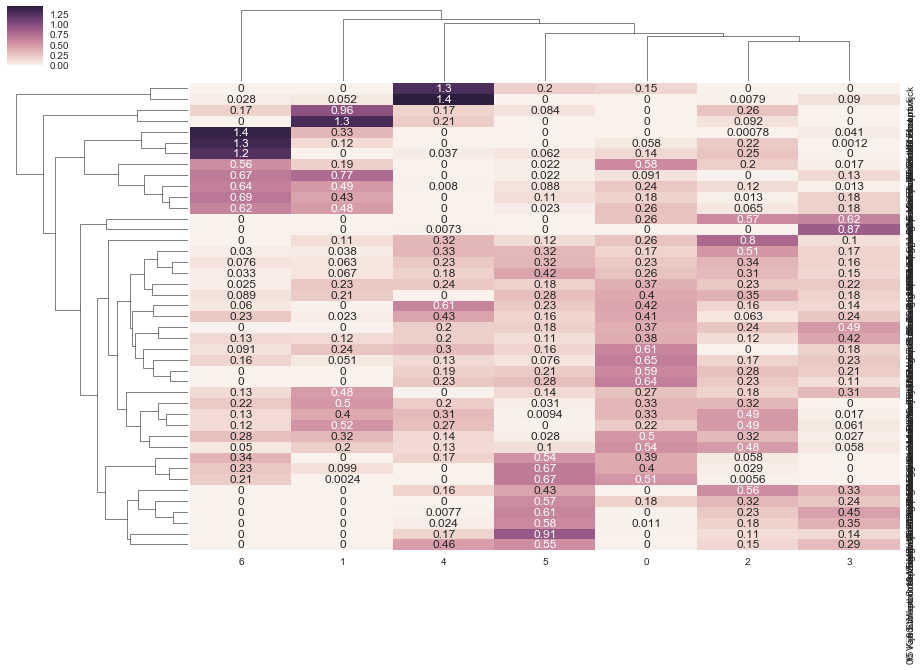

In [10]:
# Features - districts
sns.clustermap(W_df, figsize = [16, 10], annot = True)
plt.show()

### 7. Identify number of clusters using K-means and inertia values

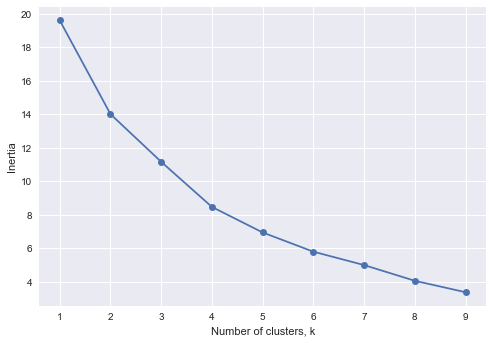

In [11]:
# 
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(W_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### 8. Cluster districts based on demographic profiles

In [12]:
model = KMeans(n_clusters = 7)
W_df['Cluster'] = model.fit_predict(W_df)

## II. Plotting results on map

In [13]:
# Uploading necessary packages
import fiona
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()
# from bokeh.plotting import *
import shapefile
from shapely.geometry import shape
import geopandas as gpd 

from bokeh.plotting import figure

Loading BokehJS ...

In [14]:
# # The idea is to get coordinates of the districts and put there piecharts
geo_df = gpd.read_file('Wijkgrenzen_Den_Haag/Wijkgrenzen_Den_Haag.shp')

# # Get the centers of the districts
centers = geo_df.centroid

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """


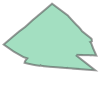

In [22]:
# # Get coordinates of district boundaries
# shape_file = fiona.open('Wijkgrenzen_Den_Haag/Wijkgrenzen_Den_Haag.shp')

# # Get the next item (district) 
# Leidschenveen = shape_file.next()

# # Get district name
# # Leidschenveen['properties']['WIJKNAAM']

# # Plot the shape
# shape(Leidschenveen['geometry'])

# # Get the bounds
# # shape(Leidschenveen['geometry']).bounds

# # Get first pair of coordinates
# # Leidschenveen['geometry']['coordinates'][0][0]

In [15]:
# Another way to process the data
sh = shapefile.Reader('Wijkgrenzen_Den_Haag/Wijkgrenzen_Den_Haag.shp')

# Get shapefile records 
sh_recs = sh.records()

# 
district_names = list()

# Get the names in the order that they stored
for i in range(len(sh_recs)):
    district_names.append(sh_recs[i][2])

# Get the coordinates
district_coors = [s.points for s in sh.shapes()]

lons_combined = np.empty((44, 0)).tolist()
lats_combined = np.empty((44, 0)).tolist() 
for i in range(len(district_coors)):
    for j in range(len(district_coors[i])):
        lons_combined[i].append(district_coors[i][j][0])
        lats_combined[i].append(district_coors[i][j][1])

In [16]:
from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, LinearColorMapper
from bokeh.palettes import Plasma6 as palette
from bokeh.plotting import figure

# palette = ['#CC3300', '#CF3C09',  '#D14411',  '#D44D1A',  '#D65523', '#D95E2B', '#DB6634',  
#            '#DE6F3D',  '#E07745',  '#E3804E',  '#E68856',  '#E8915F', '#EB9A68',  '#EDA270', 
#            '#F0AB79',  '#F2B382',  '#F5BC8A',  '#F7C493',  '#FACD9C',  '#FCD5A4',  '#FFDEAD']

palette = palette
palette.reverse()

color_mapper = LinearColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x = lons_combined,
    y = lats_combined,
    name = district_names,
    cluster = W_df['Cluster'],
))

TOOLS = "pan, wheel_zoom, reset, hover, save"

p = figure(
    title = "Den Haag, ...", tools = TOOLS,
    x_axis_location = None, y_axis_location = None
)

p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'cluster', 'transform': color_mapper},
          fill_alpha=0.9, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("District", "@name"),
    ("Cluster number", "@cluster")
#     ("(Long, Lat)", "($x, $y)"),
]
show(p)

D:\Anaconda\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


In [17]:
source = ColumnDataSource(data=dict(
    x = lons_combined,
    y = lats_combined,
    name = district_names
))

TOOLS = "pan, wheel_zoom, reset, hover, save"

p = figure(
    title = "Den Haag", tools = TOOLS,
    x_axis_location = None, y_axis_location = None
)

p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
#          fill_color={'field': 'population', 'transform': color_mapper},
#          fill_color={'transform': color_mapper},
          fill_color = 'lightsteelblue', 
          fill_alpha=1, line_color="black", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name")
#     ("Population of the district", "@population")
#     ("(Long, Lat)", "($x, $y)"),
]


# define starts/ends for wedges from percentages of a circle
percents = [0, 0.3, 0.4, 0.6, 0.9, 1]
starts = [p*2*np.pi for p in percents[:-1]]
ends = [p*2*np.pi for p in percents[1:]]

# a color for each pie piece
colors = ["red", "green", "blue", "orange", "yellow"]

n = len(district_names)
i = 0
for i in range(0, n) : 
    p.wedge(x=centers.x[i], y=centers.y[i], radius=0.0035, start_angle=starts, end_angle=ends, color=colors)

show(p, notebook_handle=True)

# Creating voting profiles

# I. Data preprocessing

## 1. Load data

In [62]:
# Read csv file
voting ='Voting 2014.csv'

# Convert csv to dataframe
df_voting  = pd.read_csv(voting, index_col = None, header = 0)
df_voting = df_voting.set_index('Wijken')

In [45]:
df_voting.head()

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
01 Oostduinen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
02 Belgisch Park,208,412,572,517,107,245,357,104,223,66,6,3,70,158,22,1,4,9,0
03 Westbroekpark/Duttendel,55,118,282,180,51,97,142,20,50,27,1,0,28,29,18,1,3,1,1
04 Benoordenhout,345,338,2046,1520,271,594,1150,97,24,106,7,11,92,108,34,1,1,4,6
05 Archipelbuurt,195,172,426,516,133,125,721,68,11,62,5,8,37,49,11,1,1,5,2


In [6]:
# df_voting.head()
# The following districts have zeros in their voting data
# '01 Oostduinen'
# '24 Haagse Bos'
# '35 Zuiderpark'
# '43 Forepark'

In [63]:
# Voting total by district
Total_by_districts =  df_voting.apply(lambda x: x.sum(), axis = 1)

# Voting total by parties
Total_by_parties =  df_voting.apply(lambda x: x.sum(), axis = 0)

# Calculate the sum for each district
df_voting['Total_districts'] =  Total_by_districts

# # Calculate the sum for each district
# df_voting.loc['Total_parties'] =  Total_by_parties

# Fill NaNs
df_voting = df_voting.fillna(0)

print('Number of districts in the dataset:', len(df_voting))
print('Number of political parties:', len(df_voting.columns) - 1)

Number of districts in the dataset: 44
Number of political parties: 19


## 2. Standartization

In [64]:
# Standartize the voting based on its value divided by total value
df_voting = df_voting.loc[:,'PvdA':'TerLin'].div(df_voting.Total_districts, axis = 0).fillna(0)

In [65]:
df_voting.head()

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
01 Oostduinen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
02 Belgisch Park,0.067445,0.133593,0.185473,0.167639,0.034695,0.079442,0.115759,0.033722,0.072309,0.021401,0.001946,0.000973,0.022698,0.051232,0.007134,0.000324,0.001297,0.002918,0.000000
03 Westbroekpark/Duttendel,0.049819,0.106884,0.255435,0.163043,0.046196,0.087862,0.128623,0.018116,0.045290,0.024457,0.000906,0.000000,0.025362,0.026268,0.016304,0.000906,0.002717,0.000906,0.000906
04 Benoordenhout,0.051073,0.050037,0.302887,0.225019,0.040118,0.087935,0.170244,0.014360,0.003553,0.015692,0.001036,0.001628,0.013620,0.015988,0.005033,0.000148,0.000148,0.000592,0.000888
05 Archipelbuurt,0.076531,0.067504,0.167190,0.202512,0.052198,0.049058,0.282967,0.026688,0.004317,0.024333,0.001962,0.003140,0.014521,0.019231,0.004317,0.000392,0.000392,0.001962,0.000785


## 3. Apply NMF

In [120]:
# Fit dataframe into NMF 
n_components = 7

model = NMF(n_components = n_components)
model.fit(df_voting)
nmf_features = model.transform(df_voting)
components = model.components_

W = nmf_features
H = components

district_names = df_voting.index
variable_names = df_voting.columns

W_df_voting = pd.DataFrame(index = district_names, columns = list(range(0, n_components)))
H_df_voting = pd.DataFrame(index =  list(range(0, n_components)) , columns = variable_names)

# fit the dataframe with its coresponding name
W_df_voting.loc[:,:] = W
H_df_voting.loc[:,:] = H

## 4. Standardize matrices

In [121]:
W_df_voting['Total'] =  W_df_voting.apply(lambda x: x.sum(), axis = 1)
W_df_voting = W_df_voting.iloc[:,0:7].div(W_df_voting.Total, axis = 0).fillna(0)
W_df_voting = pd.concat([W_df_voting, Total_by_districts], axis=1)
W_df_voting.columns.values[7] = 7
W_df_voting = W_df_voting.iloc[:,0:7].multiply(W_df_voting[7], axis = 0).fillna(0).round()

# H_df_voting['Total'] =  H_df_voting.apply(lambda x: x.sum(), axis = 1)
# H_df_voting = H_df_voting.iloc[:,0:19].div(H_df_voting.Total, axis=0).fillna(0)
H_df_voting.loc['Total'] =  H_df_voting.apply(lambda x: x.sum(), axis = 0)
H_df_voting = H_df_voting.iloc[:,0:19].div(H_df_voting.loc['Total'], axis=1).fillna(0)
H_df_voting = H_df_voting.drop(['Total'])

# Check the results
# W_df_voting.apply(lambda x: x.sum(), axis = 1)
# H_df_voting.apply(lambda x: x.sum(), axis = 1)
# H_df_voting.apply(lambda x: x.sum(), axis = 0)

In [122]:
;;;W_df_voting

,0,1,2,3,4,5,6
Wijken,,,,,,,
01 Oostduinen,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02 Belgisch Park,532.0,345.0,17.0,1286.0,593.0,199.0,112.0
03 Westbroekpark/Duttendel,212.0,0.0,0.0,636.0,161.0,43.0,53.0
04 Benoordenhout,1906.0,85.0,0.0,4489.0,160.0,68.0,47.0
05 Archipelbuurt,1447.0,0.0,0.0,655.0,122.0,101.0,223.0
06 Van Stolkpark en Schev. Bos,114.0,0.0,4.0,273.0,68.0,0.0,20.0
07 Scheveningen,1101.0,648.0,159.0,1266.0,2375.0,585.0,256.0
08 Duindorp,59.0,248.0,0.0,0.0,1433.0,410.0,0.0
09 Geuzen- en Statenkwartier,2517.0,1314.0,91.0,2231.0,1446.0,333.0,262.0


## 5. Plot clustermaps

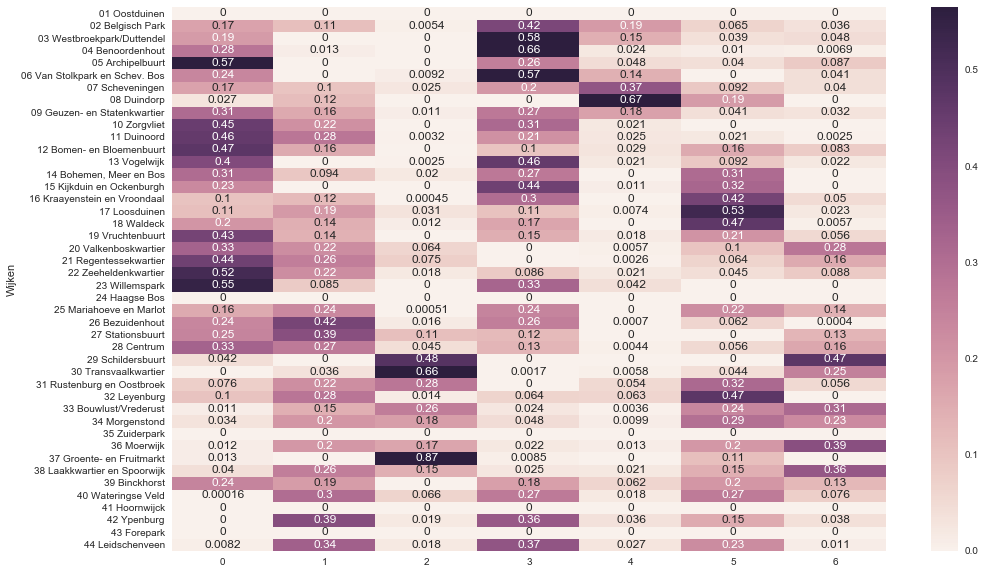

In [53]:
plt.figure(figsize = (16,10))
sns.heatmap(W_df_voting, robust = True ,annot = True)
plt.show()

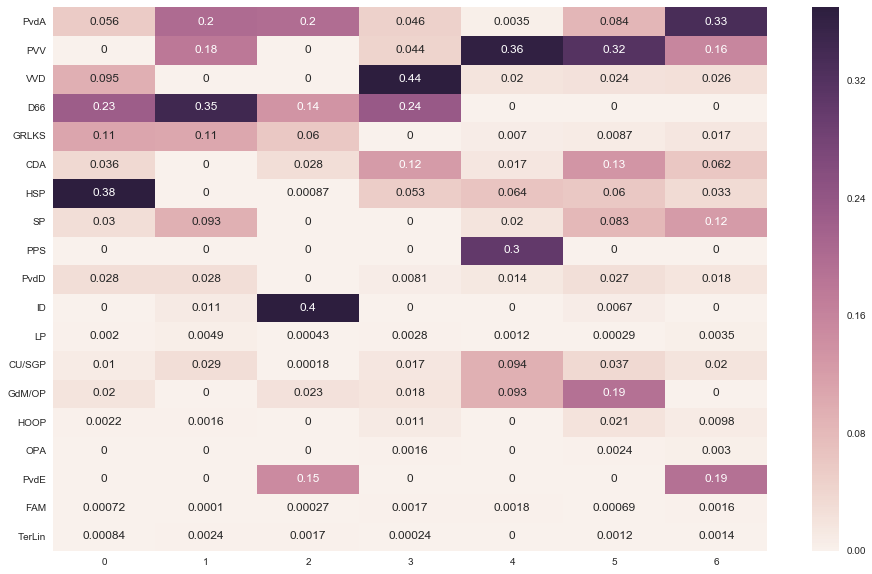

In [54]:
plt.figure(figsize = (16,10))
sns.heatmap(H_df_voting.T, robust = True ,annot = True)
plt.show()

## 6. Cluster districts based on voting profiles

In [108]:
# Gaussian mixture model
# H_df_voting = H_df_voting.T
# gmm2 = GaussianMixture(n_components=8).fit(H_df_voting)
# cluster = gmm2.predict(H_df_voting)
# H_df_voting['Cluster']= cluster
# H_df_voting

# K-means
model = KMeans(n_clusters = 7)
W_df_voting['Cluster'] = model.fit_predict(W_df_voting)

# Predicting voting behavior

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Setting up working directory
os.chdir(os.getcwd())

In [30]:
# Loading datasets
df = pd.read_csv("Multiple_Linear_Regression/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
# Defining predictors and predictive variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [ ]:
# Replacing State variables by Dummy Variables
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [ ]:
# Avoiding Dummy Variable Trap
# Excluding one Dummy Variable to prevent multicollinearity
# N.b. It can be also done automatically 
X = X[:,1:]

In [ ]:
# Splitting X and y variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

In [48]:
# Applying algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [52]:
y_pred, y_test

(array([ 103015.20159796,  132582.27760815,  132447.73845175,
          71976.09851258,  178537.48221056,  116161.24230166,
          67851.69209676,   98791.73374687,  113969.43533013,
         167921.06569551]),
 array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39,
         105008.31,   81229.06,   97483.56,  110352.25,  166187.94]))